<a href="https://colab.research.google.com/github/Kishan-Sinha/End-to-End_Data_Analysis/blob/main/EDA_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing pandas for data handling

import pandas as pd

df = pd.read_csv('/content/sample_data/Delinquency_prediction_dataset.csv')

df

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CUST0496,71,48307.0,688.0,0.486522,2,0,12707.0,0.373033,retired,9,Business,Phoenix,On-time,On-time,Missed,On-time,On-time,Late
496,CUST0497,60,86180.0,836.0,0.608174,2,1,45595.0,0.291943,Unemployed,18,Student,Houston,On-time,On-time,Late,Late,Late,Missed
497,CUST0498,54,152326.0,847.0,0.676950,0,0,44449.0,0.104839,Employed,16,Student,Phoenix,On-time,Late,Late,On-time,Late,Missed
498,CUST0499,50,105852.0,343.0,0.700643,2,1,11155.0,0.236477,Employed,11,Student,Phoenix,Late,On-time,Late,Missed,On-time,Missed


In [ ]:
# checking nan values

df.isna().sum()

,0
Customer_ID,0
Age,0
Income,39
Credit_Score,2
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,29
Debt_to_Income_Ratio,0
Employment_Status,0


<Axes: >

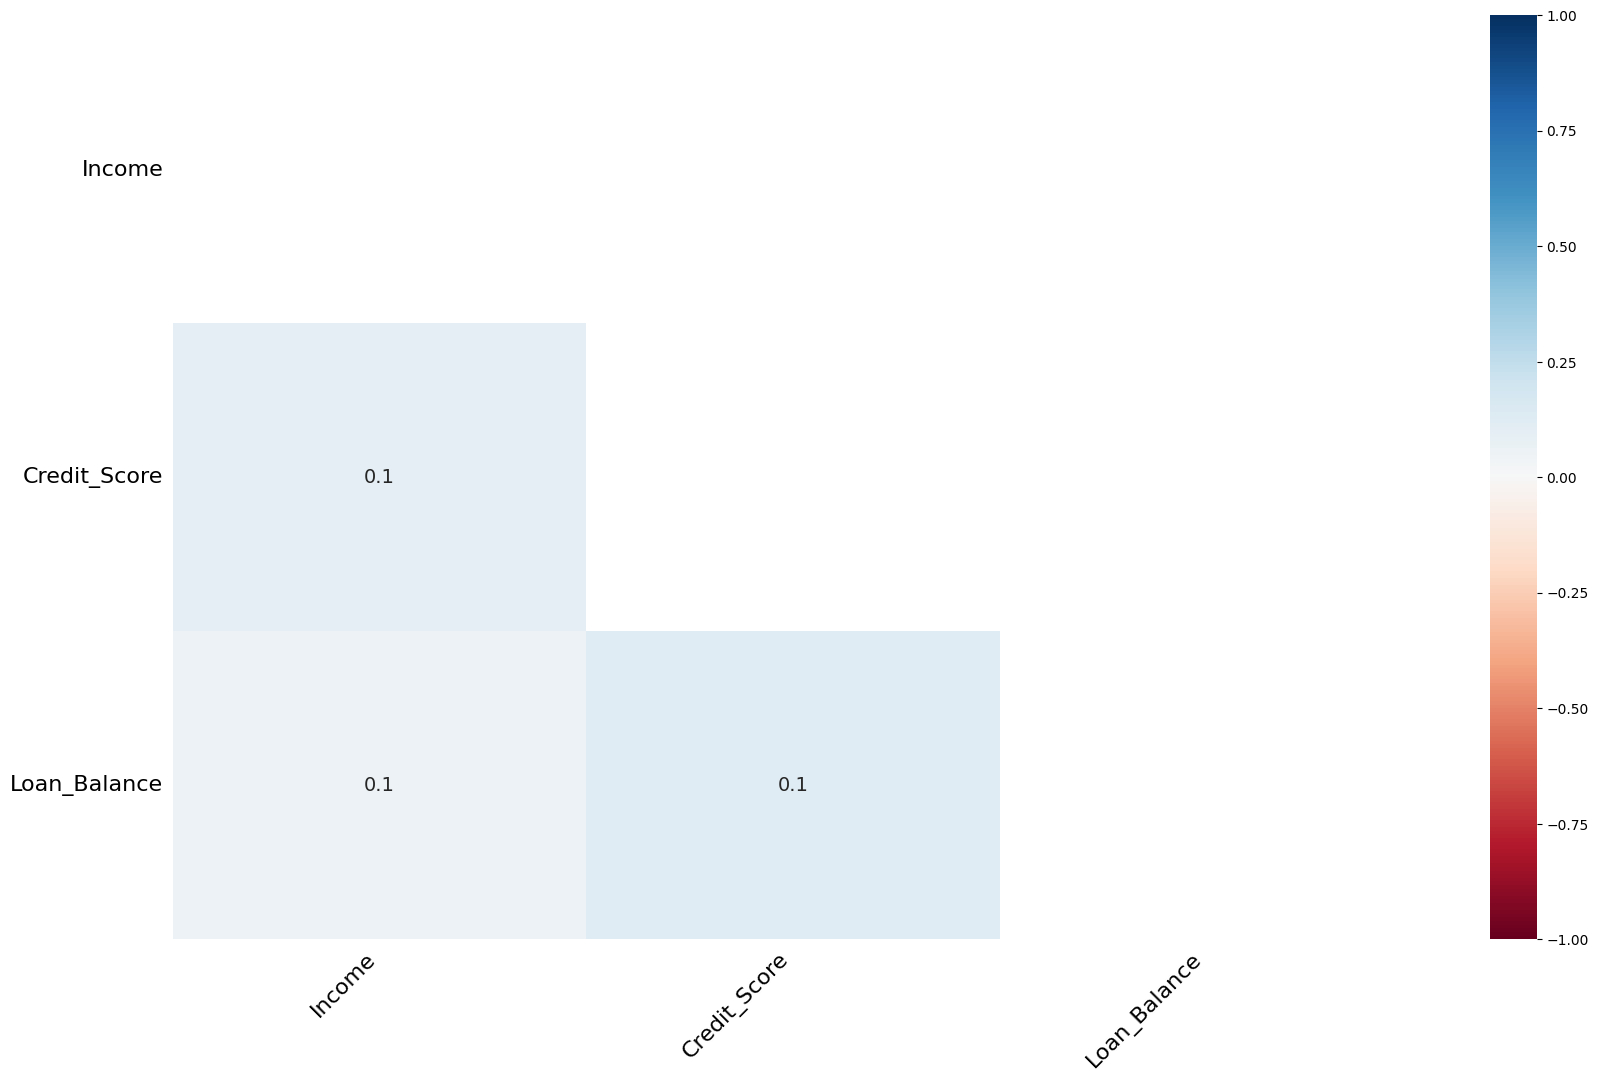

In [ ]:
# using heatmap to check for apparent relation between the missing values of different columns

import missingno as msno

msno.heatmap(df)

**Drawing definite conclusion From the above matrix will be useless as it fails to show strong relations**

In [ ]:
### CHECKING CORRELATION OF DIFFERENT VARIABLES WITH THE DEPENDENT VARIABLE ###

# importing necessary libraries

from scipy.stats import chi2_contingency, spearmanr, pointbiserialr
import numpy as np

# Define the categorical and continuous columns

nominal_cols = ['Employment_Status', 'Credit_Card_Type', 'Location']

ordinal_cols = ['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6', 'Account_Tenure', 'Missed_Payments']

# Separate features and target variable

remaining_features = df.drop('Delinquent_Account', axis=1)

target = df['Delinquent_Account']

# Chi-square test for nominal columns

print("Chi-square correlation between nominal variables and Delinquent_Account:")

for col in nominal_cols:

  contingency_table = pd.crosstab(df[col], target)
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print(f"  {col}: chi2 = {chi2:.4f}, p-value = {p:.4f}")

print("\nSpearman correlation between ordinal columns and Delinquent_Account:")

# Spearman correlation

for col in ordinal_cols:

  spearman_corr, spearman_p = spearmanr(df[col], target)
  print(f"  {col}: correlation = {spearman_corr:.4f}, p-value = {spearman_p:.4f}")

print("\nPoint-biserial correlation between continuous variables and Delinquent_Account:")

# Point-biserial correlation for other continuous columns

# Identify continuous columns that are not in the spearman_cols and are not categorical

continuous_cols = [col for col in remaining_features.columns if col not in nominal_cols and col not in ordinal_cols]

for col in continuous_cols:

  # Ensure the column is numerical

  if pd.api.types.is_numeric_dtype(df[col]):

    # handling nan values

    temp_df = df[[col, 'Delinquent_Account']].dropna()

    if len(temp_df) > 1: # Ensure there are enough data points after dropping NaNs

      point_biserial_corr, point_biserial_p = pointbiserialr(temp_df[col], temp_df['Delinquent_Account'])

      print(f"  {col}: correlation = {point_biserial_corr:.4f}, p-value = {point_biserial_p:.4f}")
    else:
      print(f"  {col}: Not enough data points to calculate Point-biserial correlation after dropping NaNs.")
  else:
      print(f"  {col}: Is not a numeric column, skipping Point-biserial correlation.")


Chi-square correlation between nominal variables and Delinquent_Account:
  Employment_Status: chi2 = 2.5120, p-value = 0.7747
  Credit_Card_Type: chi2 = 4.4010, p-value = 0.3544
  Location: chi2 = 2.3939, p-value = 0.6637

Spearman correlation between ordinal columns and Delinquent_Account:
  Month_1: correlation = 0.0939, p-value = 0.0359
  Month_2: correlation = 0.0272, p-value = 0.5442
  Month_3: correlation = 0.0133, p-value = 0.7672
  Month_4: correlation = -0.0889, p-value = 0.0469
  Month_5: correlation = -0.0323, p-value = 0.4714
  Month_6: correlation = 0.0532, p-value = 0.2353
  Account_Tenure: correlation = -0.0360, p-value = 0.4219
  Missed_Payments: correlation = -0.0248, p-value = 0.5807

Point-biserial correlation between continuous variables and Delinquent_Account:
  Customer_ID: Is not a numeric column, skipping Point-biserial correlation.
  Age: correlation = 0.0225, p-value = 0.6156
  Income: correlation = 0.0454, p-value = 0.3306
  Credit_Score: correlation = 0.0348

**--In a overall sense MONTH 1 TO 6 show the most correlation with the dependent variable, and INCOME variable also show best correlation among the continous variables. Other than that, influence of all other variables seem negligible**

**--Aside from that, we can see an obnoxious relationship between Missed payments and rate of delinquency (negatively correlated) which needs further research**

**Since different column aren't strongly related, we will skip model based imputation and opt for statistical imputation**

In [ ]:
# Running over the nan values to check for inconsistencies

df[df.isna().any(axis=1)]

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
8,CUST0009,36,66991.0,405.0,0.413035,5,1,NaN,0.219854,Employed,12,Student,Phoenix,On-time,On-time,On-time,Missed,Late,On-time
23,CUST0024,47,108468.0,538.0,0.816191,2,1,NaN,0.317053,retired,7,Gold,Phoenix,Late,Late,Late,On-time,Late,Late
25,CUST0026,19,193998.0,515.0,0.255552,5,0,NaN,0.259893,EMP,12,Gold,Phoenix,Late,Missed,On-time,Late,Missed,On-time
28,CUST0029,29,86726.0,588.0,0.598677,2,0,NaN,0.296942,Self-employed,16,Student,Houston,Late,Late,Missed,On-time,Late,On-time
40,CUST0041,61,NaN,372.0,0.109776,4,0,44454.0,0.114767,Self-employed,12,Student,Los Angeles,Late,Missed,Late,On-time,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,CUST0466,30,NaN,664.0,0.902976,5,0,NaN,0.317803,Unemployed,17,Gold,Los Angeles,Missed,Missed,Missed,Late,On-time,On-time
473,CUST0474,63,NaN,475.0,0.600764,5,0,75316.0,0.293759,Self-employed,8,Student,Phoenix,Missed,On-time,Missed,Late,Late,Late
481,CUST0482,51,59811.0,792.0,0.560031,3,0,NaN,0.100000,EMP,11,Standard,Houston,Late,Late,Late,On-time,On-time,Late
482,CUST0483,19,NaN,766.0,0.556442,3,0,NaN,0.327139,Employed,8,Business,Phoenix,Missed,On-time,Late,Late,Missed,Late


***Row no. 115 shows multiple grave inconsistencies with an AGE of 18 and an account tenure of 12 years nonetheless with an 'retired' employment status.. So we decide to remove this row ***

In [ ]:
# removing row no. 115

df.drop(115, inplace=True)

In [ ]:
### CHECKING DATA INCONSISTENCIES ###

# checking all unique values of categorical columns

def check_unique_categorical_values(df, categorical_cols):

  print("\nUnique values in categorical columns:")

  for col in categorical_cols:

    if col in df.columns:

      print(f"\n {col}: {df[col].unique()}")

    else:

      print(f"  Warning: Column '{col}' not found in the DataFrame.")

# Combine nominal and ordinal columns for checking unique values

all_categorical_cols = nominal_cols + ordinal_cols

# Return output

check_unique_categorical_values(df.copy(), all_categorical_cols)


Unique values in categorical columns:

 Employment_Status: ['EMP' 'Self-employed' 'Unemployed' 'employed' 'Employed' 'retired']

 Credit_Card_Type: ['Student' 'Standard' 'Platinum' 'Gold' 'Business']

 Location: ['Los Angeles' 'Phoenix' 'Chicago' 'New York' 'Houston']

 Month_1: ['Late' 'Missed' 'On-time']

 Month_2: ['Late' 'Missed' 'On-time']

 Month_3: ['Missed' 'Late' 'On-time']

 Month_4: ['Late' 'Missed' 'On-time']

 Month_5: ['Missed' 'On-time' 'Late']

 Month_6: ['Late' 'On-time' 'Missed']

 Account_Tenure: [18  0  1 15 11  7 17 12  5  8 10  6  9 19 14  3 16  2  4 13]

 Missed_Payments: [3 6 0 2 5 4 1]


**Here in "Employment Status" column, we can see that multiple classes "EMP" , "employed" , "Employed" all denote to the same category.**

In [ ]:
# removing duplicate classes of "employment status" column

df['Employment_Status'] = df['Employment_Status'].replace(['EMP', 'employed', 'Employed'], 'Employed')

In [ ]:
### CHECKING ABNORMAL DATA ###

# checking "Credit score" column whose values are supposed to be within the limit of 300 to 850

is_within_range = df['Credit_Score'].dropna().between(300,850, inclusive='both').all()

if is_within_range:

  print("All values in the 'Credit_Score' column are within the range of 300 to 850.")

else:

  print("There are values in the 'Credit_Score' column outside the range of 300 to 850.")

  # Print the values outside the range

  print("Values outside the range:")

  print(df[(df['Credit_Score'] < 300) | (df['Credit_Score'] > 850)]['Credit_Score'])

All values in the 'Credit_Score' column are within the range of 300 to 850.


In [ ]:
# Checking "Debt_to_Income_Ratio" column whose values are supposed to be within the limit of 0 to 1

is_within_range_2 = df['Debt_to_Income_Ratio'].dropna().between(0,1, inclusive='both').all()

if is_within_range_2:

  print("All values in the 'Debt_to_Income_Ratio' column are within the range of 0 to 1.")

else:

  print("There are values in the 'Debt_to_Income_Ratio' column outside the range of 0 to 1.")

  # Print the values outside the range

  print("Values outside the range:")

  print(df[(df['Debt_to_Income_Ratio'] < 0) | (df['Debt_to_Income_Ratio'] > 1)]['Debt_to_Income_Ratio'])

All values in the 'Debt_to_Income_Ratio' column are within the range of 0 to 1.


In [ ]:
# checking "Credit Utilization" column whose values are supposed to be within the limit of 0 and 1

is_within_range_3 = df['Credit_Utilization'].dropna().between(0, 1, inclusive='both').all()

if is_within_range_3:

  print("All values in the 'Credit_Utilization' column are within the range of 0 to 1.")

else:

  print("There are values in the 'Credit_Utilization' column outside the range of 0 to 1.")

  # Print the values outside the range

  print("Values outside the range:")

  print(df[(df['Credit_Utilization'] < 0) | (df['Credit_Utilization'] > 1)]['Credit_Utilization'])

There are values in the 'Credit_Utilization' column outside the range of 0 to 1.
Values outside the range:
89     1.025843
265    1.025017
292    1.002482
426    1.008734
Name: Credit_Utilization, dtype: float64


In [ ]:
# Check the abnormal rows of Credit utilization column

df[(df['Credit_Utilization'] < 0) | (df['Credit_Utilization'] > 1)]

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
89,CUST0090,65,127856.0,361.0,1.025843,2,0,2200.0,0.346267,Employed,14,Standard,Chicago,On-time,Late,On-time,Missed,Missed,On-time
265,CUST0266,72,16062.0,584.0,1.025017,1,0,92285.0,0.240017,Unemployed,17,Gold,Phoenix,Missed,Late,Missed,Missed,On-time,Late
292,CUST0293,49,38061.0,316.0,1.002482,1,0,95267.0,0.448824,Employed,16,Student,Chicago,Late,Late,Late,Late,Missed,Missed
426,CUST0427,49,163216.0,768.0,1.008734,6,0,60530.0,0.452937,Employed,15,Gold,New York,Late,On-time,Missed,Late,Late,Missed


**From the above 4 rows, row 426 shows acute inconsistencies across multiple domain, such as high credit score and relatively higher income inspite of multiple missed payments and abonormal cerdit utilization... So we decided on deleting this row too**

In [ ]:
# deleting row no. 426

df.drop(426, inplace=True)

In [ ]:
### DATA IMPUTATION ###

# Checking statistical description of columns containing nan values

df[['Loan_Balance','Income','Credit_Score']].describe()

,Loan_Balance,Income,Credit_Score
count,470.000000,459.000000,497.000000
mean,48629.161702,108231.004357,577.334004
std,29421.738485,53714.775364,168.834886
min,612.000000,15404.000000,301.000000
25%,23700.750000,61917.500000,418.000000
50%,45685.500000,107193.000000,584.000000
75%,75661.750000,155620.500000,725.000000
max,99620.000000,199943.000000,847.000000


**As we can see that the distribution for income and loan balance (mean != 50%) is a bit skewed so we will use median imputation on them and as for Credit score, we will use mean imputation**

In [ ]:
# Median imputation for loan balance & Income

cols = ['Income','Loan_Balance']

for x in cols:

    df[x] = df[x].fillna(df[x].median())

# Mean imputation for credit_score

df['Credit_Score'] = df['Credit_Score'].fillna(df['Credit_Score'].mean())

In [ ]:
# Selecting only the key variables for processing a clean dataset

columns_to_keep = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Missed_Payments', 'Debt_to_Income_Ratio',
                   'Employment_Status', 'Account_Tenure', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

df_clean = df[columns_to_keep].copy()

# Drop the index column

df_clean = df_clean.reset_index(drop=True)

df_clean

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,56,165580.0,398.0,0.390502,3,0.317396,Employed,18,Late,Late,Missed,Late,Missed,Late
1,69,100999.0,493.0,0.312444,6,0.196093,Self-employed,0,Missed,Missed,Late,Missed,On-time,On-time
2,46,188416.0,500.0,0.359930,0,0.301655,Self-employed,1,Missed,Late,Late,On-time,Missed,Late
3,32,101672.0,413.0,0.371400,3,0.264794,Unemployed,15,Late,Missed,Late,Missed,Late,Late
4,60,38524.0,487.0,0.234716,2,0.510583,Self-employed,11,Missed,On-time,Missed,Late,Late,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,71,48307.0,688.0,0.486522,2,0.373033,retired,9,On-time,On-time,Missed,On-time,On-time,Late
494,60,86180.0,836.0,0.608174,2,0.291943,Unemployed,18,On-time,On-time,Late,Late,Late,Missed
495,54,152326.0,847.0,0.676950,0,0.104839,Employed,16,On-time,Late,Late,On-time,Late,Missed
496,50,105852.0,343.0,0.700643,2,0.236477,Employed,11,Late,On-time,Late,Missed,On-time,Missed


In [ ]:
# saving the clean dataset for further analysis

df_clean.to_csv('Delinquency_prediction_dataset_clean.csv', index=False)

**The above saved dataset will be used to do further analysis by the decision makers of the company and help them provide actionable insights for future risk assessment strategies**